# EDA in Pandas
#### it's the first step of analysing the data,during this process,we'll cleaning, identifying trends & patterns within the data,
#### understand the relationships between the features and look at outliers that may exist within your dataset
#### in this process we'll be looking at also mistakes and missing values that will be cleanned subsequently

In [52]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
df = pd.read_table(r"C:\Users\raphi\OneDrive\Desktop\PORTFOLIO\PYTHON\Pandas\world_population.csv", sep = ',')
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.1,1.0,0.5
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.9,1.0,0.0
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.9,1.0,0.6
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.5,1.0,0.0
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.2,1.0,0.0
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8,1.0,0.4
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.6,1.0,0.2


In [11]:
# Change the format of the values,(decimal numbers etc)
pd.set_option('display.float_format',lambda x: '%.1f' % x)

## Step 1) check out for potential inconsistencies/irregularities/incoherences(either ouliters or missing values ...,or somthing that is wrong )wihtin the data before DATA CLEANNING process

In [13]:
# Gives us a quick glance on how our data looks like, this comes in handy later on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

#### after analysing, we noticed that out of the total number of columns(234), the values decrease for certain variables
#### meaning that there's some missing values & it may obstruates our analysis later on, so let's handle this

In [18]:
df.isnull().sum()
#pulls up the number of missing values

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [19]:
df.nunique()
# display the unique values

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

#### if we analyse this data, we'll notice that from rank to Continent, they are unique values, from 2022 Pop to Grow rate, aside from missing values,it makes perfect sense that there are unique values & for world pop per that's because some of the percentage are alike thus 70 of them are consider to be unique

# How to deal with missing values?
### some hints: Depends of the data your working on, you can populated it by median values, drop it if it's not relevant... 

In [15]:
# pull up a panoramic view and gives us a glimpse of our data
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.0,230.0,233.0,230.0,227.0,227.0,229.0,229.0,230.0,232.0,230.0,232.0,234.0
mean,117.5,34632250.9,33600711.0,32066004.2,30270164.5,26840495.3,19330463.9,16282884.8,15866499.1,581663.7,456.8,1.0,0.4
std,67.7,137889172.4,135873196.6,131507146.3,126074183.5,113352454.6,81309625.0,69345465.5,68355859.8,1769133.1,2083.7,0.0,1.7
min,1.0,510.0,520.0,564.0,596.0,651.0,700.0,733.0,752.0,1.0,0.0,0.9,0.0
25%,59.2,419738.5,406471.0,394295.0,382726.5,329470.0,261928.0,223752.0,145880.5,2567.2,36.6,1.0,0.0
50%,117.5,5762857.0,5456681.0,5244415.0,4889741.0,4491202.0,3785847.0,3135123.0,2511718.0,77141.0,95.3,1.0,0.1
75%,175.8,22653719.0,21522626.0,19730853.8,16825852.5,15625467.0,11882762.0,9817257.0,8817329.0,414643.2,236.9,1.0,0.3
max,234.0,1425887337.0,1424929781.0,1393715448.0,1348191368.0,1264099069.0,1153704252.0,982372466.0,822534450.0,17098242.0,23172.3,1.1,17.9


In [42]:
# let's start the analysis process by pulling up the top range of countries by highest population in 2022
df.sort_values('2022 Population', ascending=False).head(10)


,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.0,1424929781.0,1393715448.0,1348191368.0,1264099069.0,1153704252.0,982372466.0,822534450.0,9706961.0,146.9,1.0,17.9
92,2,IND,India,New Delhi,Asia,1417173173.0,1396387127.0,1322866505.0,1240613620.0,1059633675.0,NaN,NaN,557501301.0,3287590.0,431.1,1.0,17.8
221,3,USA,United States,"Washington, D.C.",North America,338289857.0,335942003.0,324607776.0,311182845.0,282398554.0,248083732.0,223140018.0,200328340.0,9372610.0,36.1,1.0,4.2
93,4,IDN,Indonesia,Jakarta,Asia,275501339.0,271857970.0,259091970.0,244016173.0,214072421.0,182159874.0,148177096.0,115228394.0,1904569.0,144.7,1.0,3.5
156,5,PAK,Pakistan,Islamabad,Asia,235824862.0,227196741.0,210969298.0,194454498.0,154369924.0,115414069.0,80624057.0,59290872.0,881912.0,267.4,1.0,3.0
149,6,NGA,Nigeria,Abuja,Africa,218541212.0,208327405.0,183995785.0,160952853.0,122851984.0,95214257.0,72951439.0,55569264.0,923768.0,236.6,1.0,2.7
27,7,BRA,Brazil,Brasilia,South America,215313498.0,213196304.0,205188205.0,196353492.0,175873720.0,150706446.0,122288383.0,96369875.0,8515767.0,25.3,1.0,2.7
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.0,167420951.0,157830000.0,148391139.0,129193327.0,107147651.0,83929765.0,67541860.0,147570.0,1160.0,1.0,2.1
171,9,RUS,Russia,Moscow,Europe,144713314.0,145617329.0,144668389.0,143242599.0,146844839.0,148005704.0,138257420.0,130093010.0,17098242.0,8.5,1.0,1.8
131,10,MEX,Mexico,Mexico City,North America,127504125.0,125998302.0,120149897.0,112532401.0,97873442.0,81720428.0,67705186.0,50289306.0,1964375.0,64.9,1.0,1.6


#### Turns out China ,India & USA are the most populated countries in the world, with the top 2  having over a Billion individues

In [48]:
# let's look at correlation  
df.corr(numeric_only= True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.0,-0.4,-0.4,-0.4,-0.4,-0.3,-0.3,-0.3,-0.3,-0.4,0.1,-0.2,-0.4
2022 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2020 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2015 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2010 Population,-0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.0,1.0
2000 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1990 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1980 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
1970 Population,-0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,-0.0,-0.1,1.0
Area (km²),-0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,-0.1,-0.0,0.5


In [71]:
#### the most close to 1, the more correleted they are
#import matplotlib.pyplot as plt

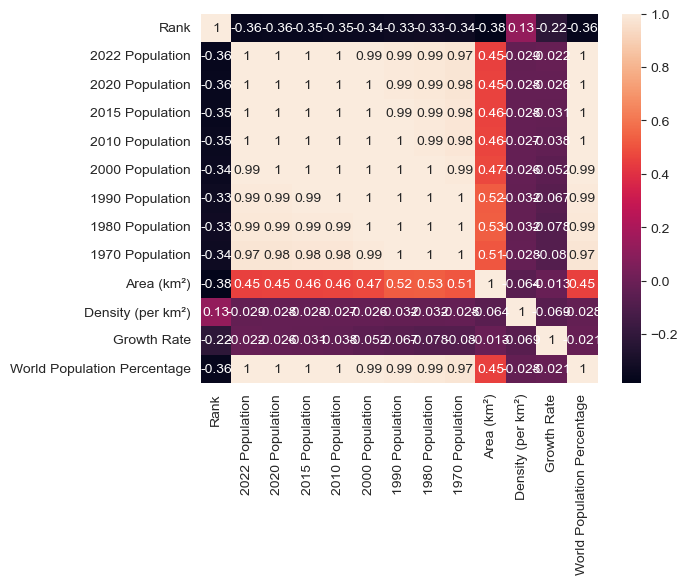

In [73]:
# now let's visualize it 
sns.heatmap(df.corr(numeric_only = True), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

## Use case) Are they certains continents that are growing faster than others?

In [87]:
df.groupby('Continent').mean(numeric_only = True).sort_values('2022 Population', ascending=False)



#pull up what is in Oceania
#df[df['Continent'].str.contains('Oceania')]

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.6,96327387.3,94955134.4,89165003.6,89087770.0,80580835.1,48639995.3,40278333.3,43839877.8,642762.8,1025.0,1.0,1.2
South America,97.6,31201186.3,30823574.5,29509599.7,26789395.5,25015888.7,21224743.9,17270643.3,13781939.7,1301302.8,21.0,1.0,0.4
Africa,92.2,25455879.7,23871435.3,21419703.6,18898197.3,14598365.9,11376964.5,8586032.0,6567175.3,537879.3,126.4,1.0,0.3
Europe,124.5,15055371.8,14915843.9,15027454.1,14712278.7,14817685.7,14785203.9,14200004.5,13118479.8,460208.2,663.3,1.0,0.2
North America,160.9,15007403.4,14855914.8,14259596.2,13568016.3,12151739.6,10531660.6,9207334.0,7885865.2,606104.4,272.5,1.0,0.2
Oceania,188.5,2046386.3,1910149.0,1756664.5,1613163.7,1357512.1,1162774.9,996532.2,846968.3,370220.9,132.5,1.0,0.0


In [106]:
# Hard to interpret, let's visualize it instead
df2=df.groupby('Continent')[df.columns[5:13][::-1]].mean(numeric_only = True).sort_values('2022 Population', ascending=False)
df2
#[::-1] allows us to select column but backward, so it basicaly inverted or reverse the order of column

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,43839877.8,40278333.3,48639995.3,80580835.1,89087770.0,89165003.6,94955134.4,96327387.3
South America,13781939.7,17270643.3,21224743.9,25015888.7,26789395.5,29509599.7,30823574.5,31201186.3
Africa,6567175.3,8586032.0,11376964.5,14598365.9,18898197.3,21419703.6,23871435.3,25455879.7
Europe,13118479.8,14200004.5,14785203.9,14817685.7,14712278.7,15027454.1,14915843.9,15055371.8
North America,7885865.2,9207334.0,10531660.6,12151739.6,13568016.3,14259596.2,14855914.8,15007403.4
Oceania,846968.3,996532.2,1162774.9,1357512.1,1613163.7,1756664.5,1910149.0,2046386.3


In [103]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

<Axes: xlabel='Continent'>

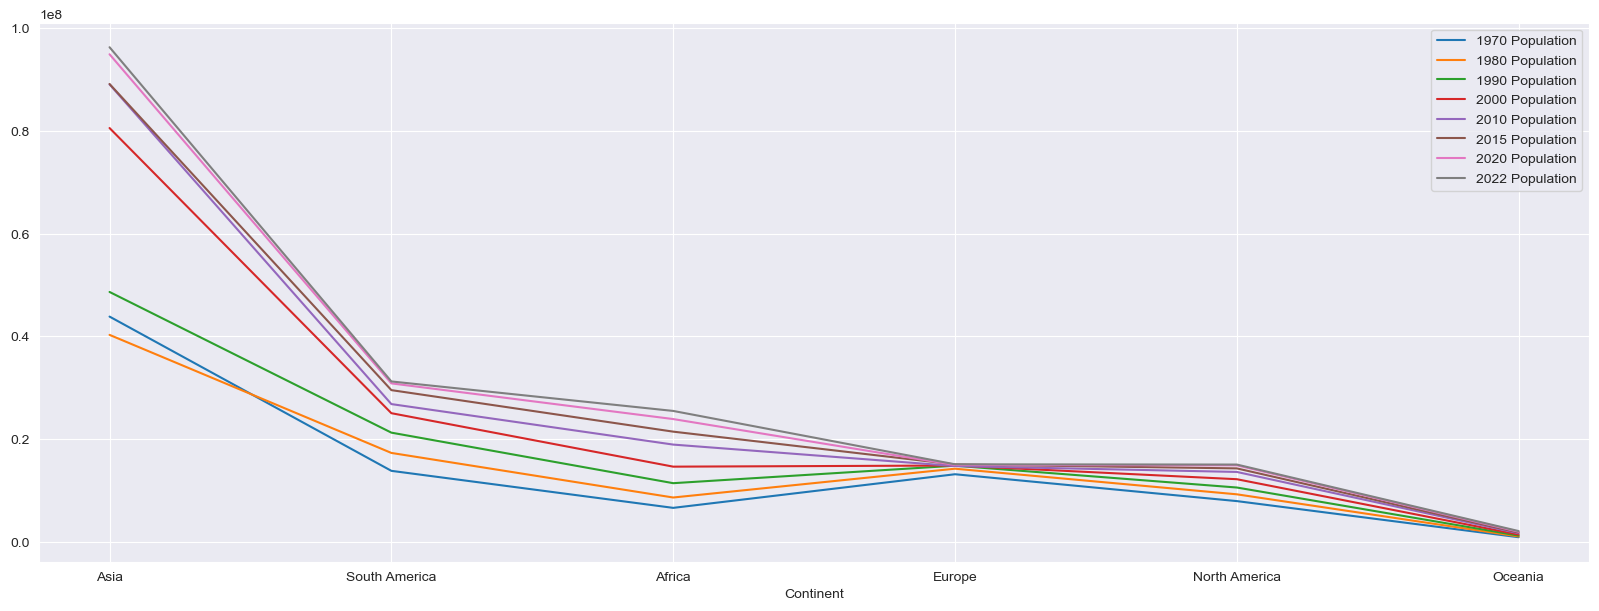

In [107]:
df2.plot()

<Axes: >

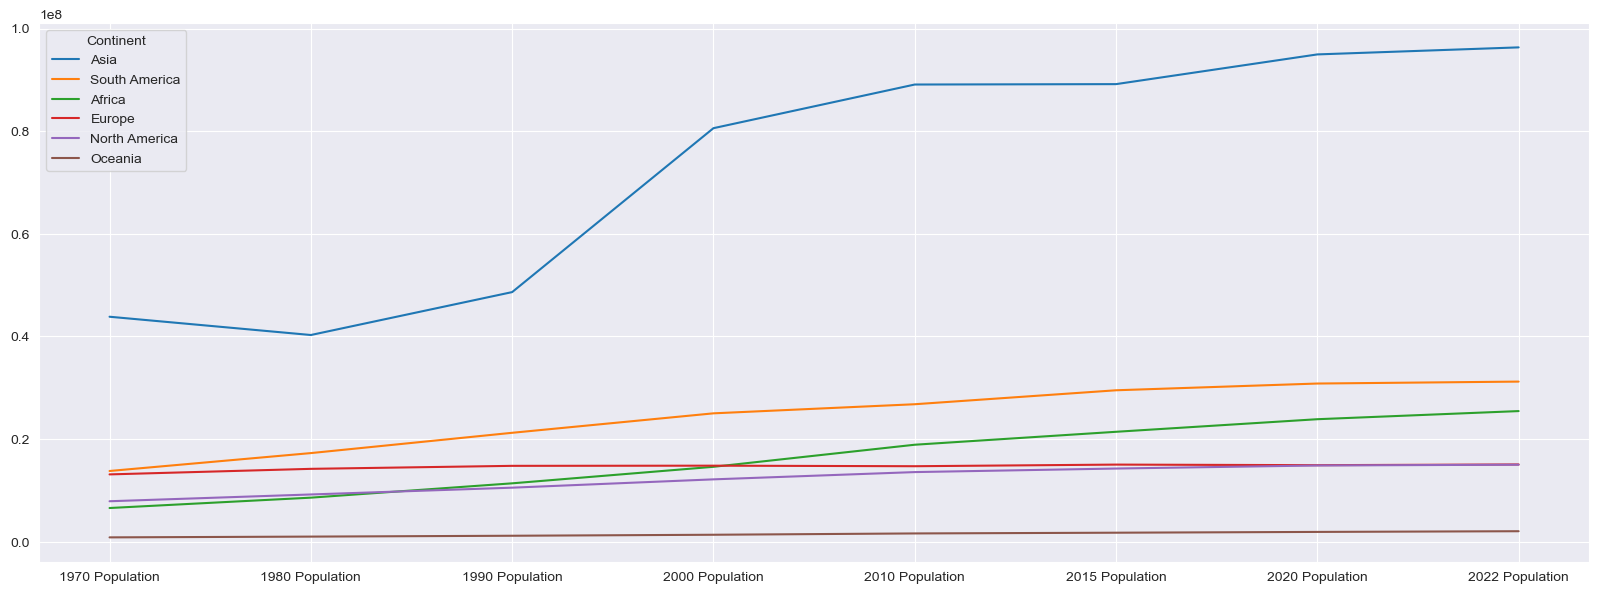

In [108]:
df3= df2.transpose()
df3
df3.plot()

In [109]:
### This graphic portray the rapid grow of continents, at a glance we can see that Asia from 1980 to 1990 slightly grow, then drastically skyrocketting to reach its spike in the early  20's where it explode, then stabilize from 2010 to 2022 

In [ ]:
## Finding outliers

### Boxplot is good fit to find outliers, and we're gonna be looking into the dots

<Axes: >

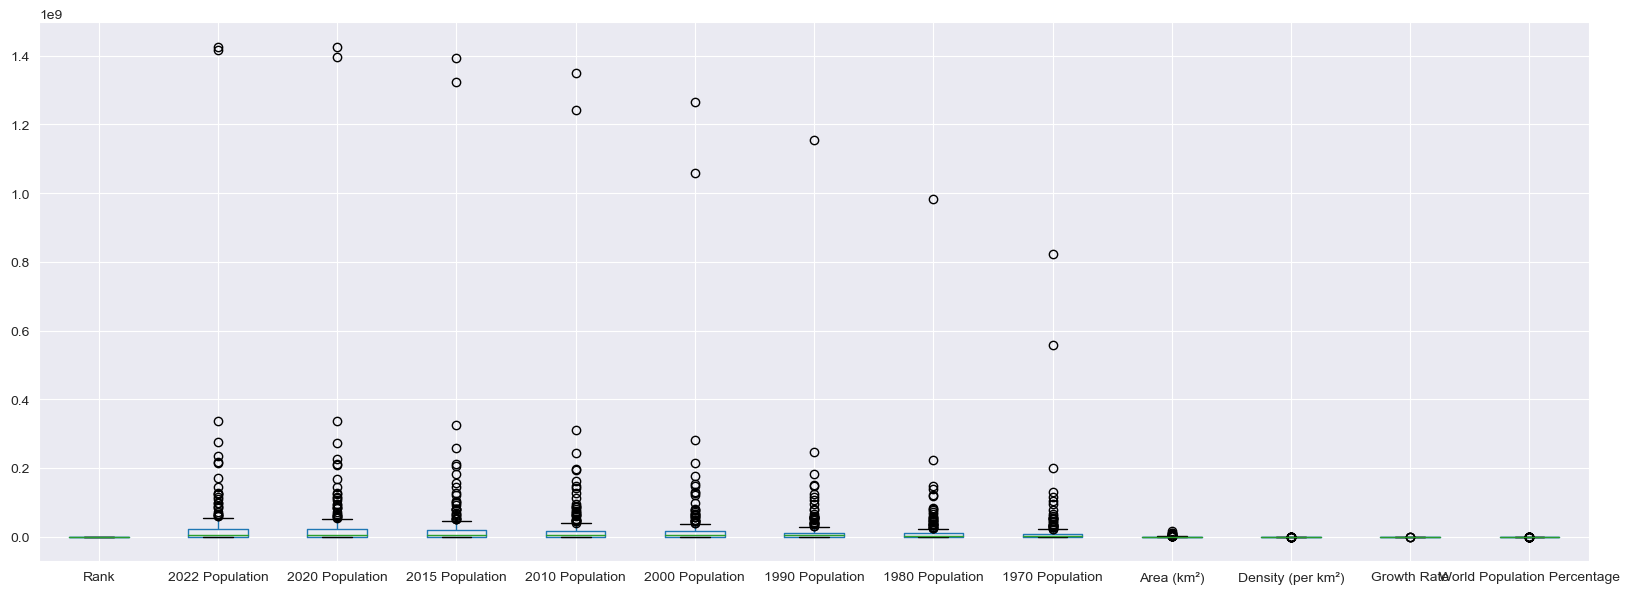

In [110]:
df.boxplot()

In [ ]:
# by def outlier is data that is very differnt from the all the others or doesn't follow the same pattern like the others and here, Dots are represented by outliers countries

In [114]:
df.dtypes

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [113]:
df.select_dtypes(include='number')
# only returns us data with number characteristic, useful while exploring and visualize

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.1,1.0,0.5
1,138,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.9,1.0,0.0
2,34,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.9,1.0,0.6
3,213,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.5,1.0,0.0
4,203,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.5,1.0,0.0
230,172,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.2,1.0,0.0
231,46,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8,1.0,0.4
232,63,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.6,1.0,0.2
